A lively community of people including students, researchers and tinkerers from Marseille (France) celebrate the so-called ["π-day"](http://www.piday.fr) on the 3rd month, 14th day of each year. A nice occasion for general talks on mathematics and society in a lively athmosphere and of course to ... a pie contest!

I participated last year (in [2016](http://www.piday.fr/2016/)) with a pie called "Monte Carlo". Herein, I give the recipe by giving some clues on its design... This page is a [notebook](http://jupyter.org/) - meaning that you can download it and re-run the analysis I do here at home (and most importantly comment or modify it and correct potential bugs...).

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
fig_width = 10
figsize = (fig_width, fig_width)
%load_ext autoreload
%autoreload 2

The pie looked like this:

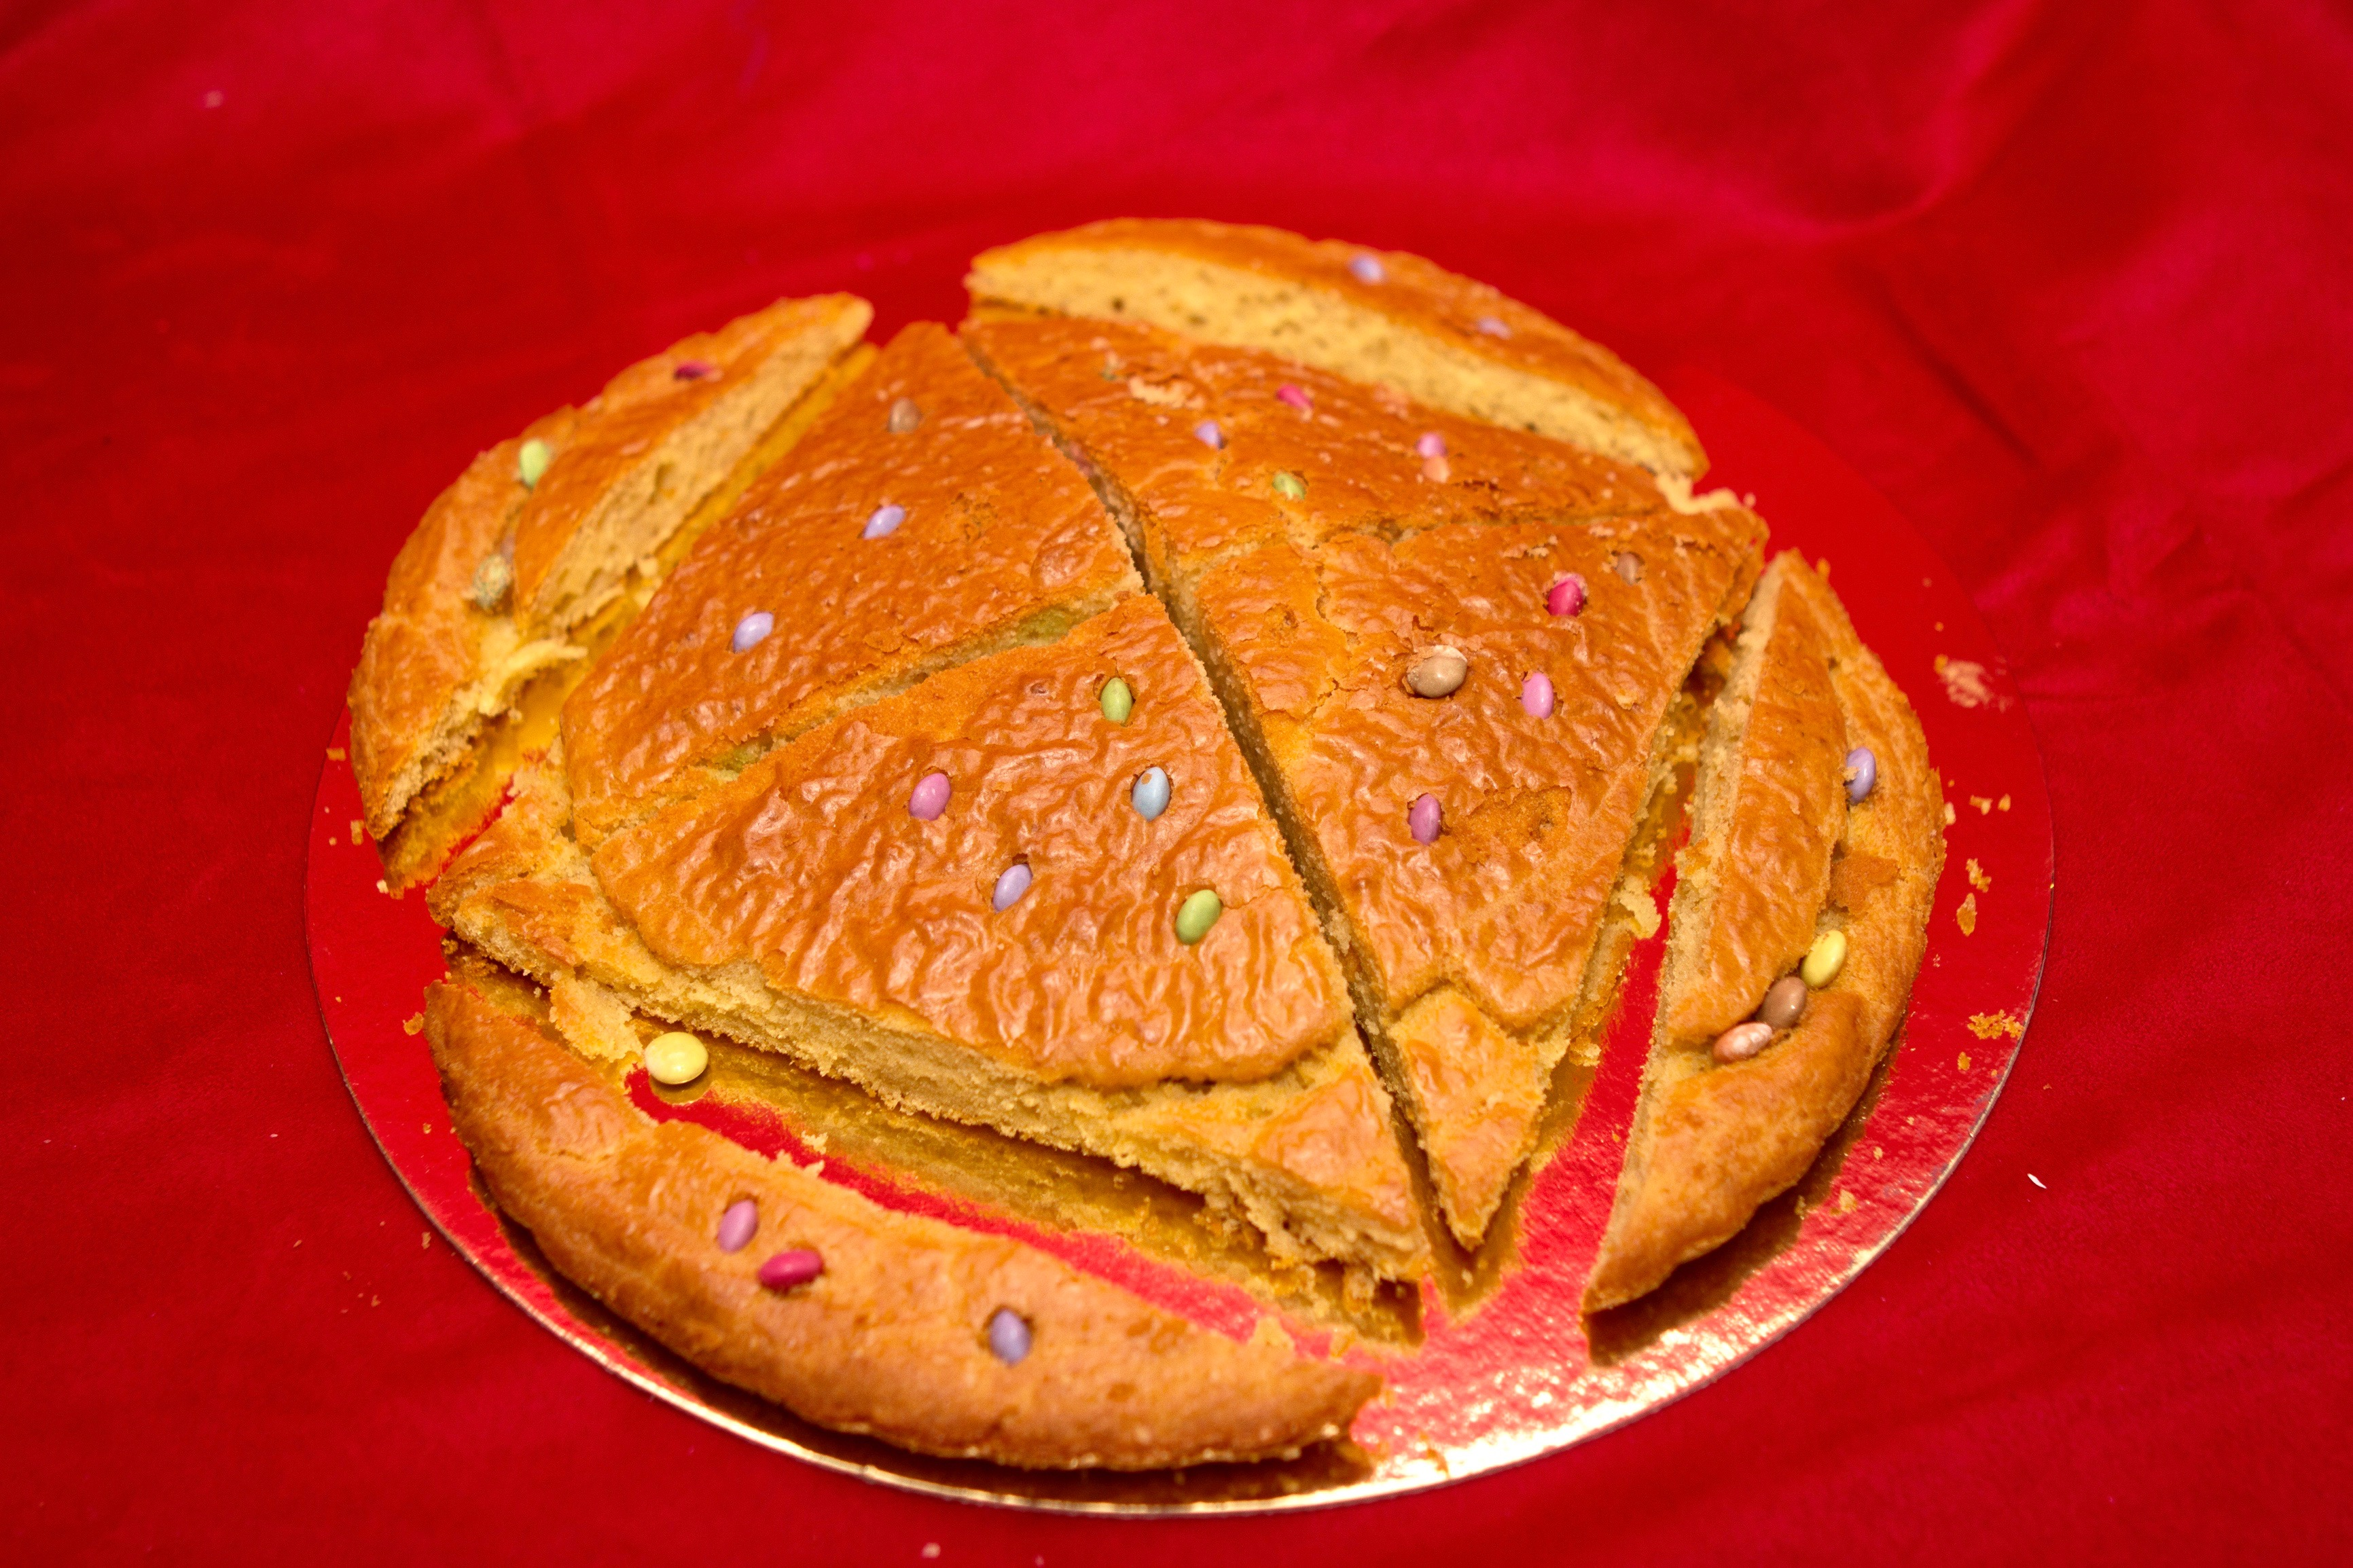

In [2]:
from IPython.display import Image
Image('http://www.piday.fr/images/tartes-2016/24.jpg')

## the recipe

The global design of the pie was to start from its round shape ... 

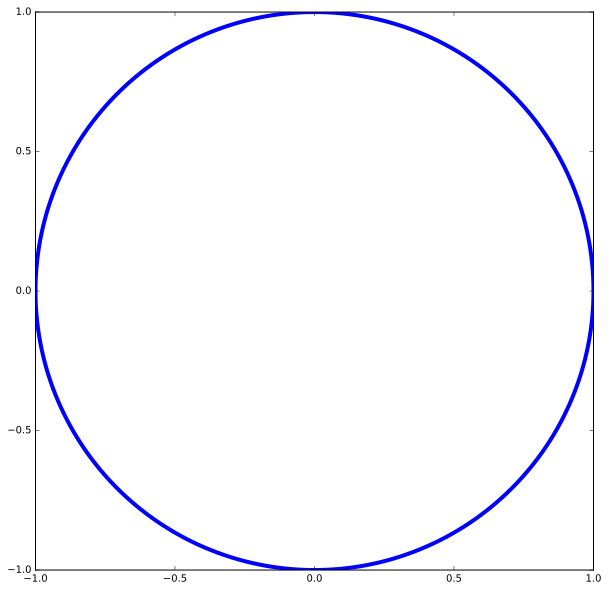

In [3]:
fig, ax = plt.subplots(figsize=figsize)
N_dots = 256
angles = np.linspace(0, 2*np.pi, N_dots, endpoint=True)
ax.plot(np.cos(angles), np.sin(angles), lw=4);

and to trace the biggest square inside it. To do that, you do not need anything special, but to draw the diagonals on the cardinals: 

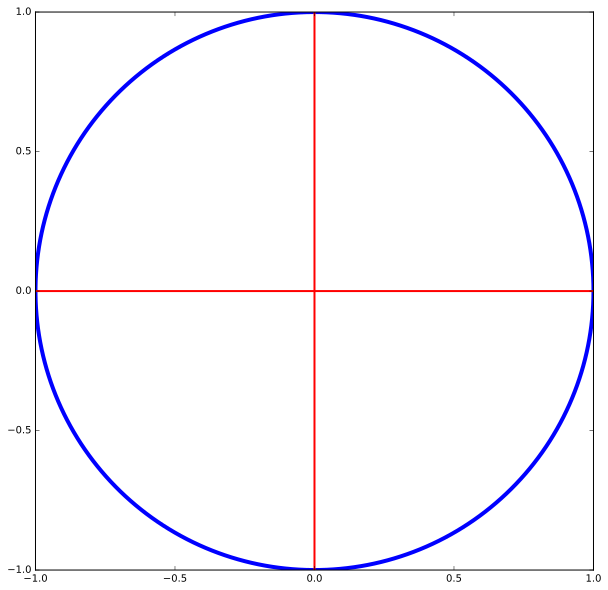

In [4]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.cos(angles), np.sin(angles), lw=4);
ax.plot([0, 0], [-1, 1], 'r', lw=2);
ax.plot([-1, 1], [0, 0], 'r', lw=2);

and finally to join their extremities to get this square: 

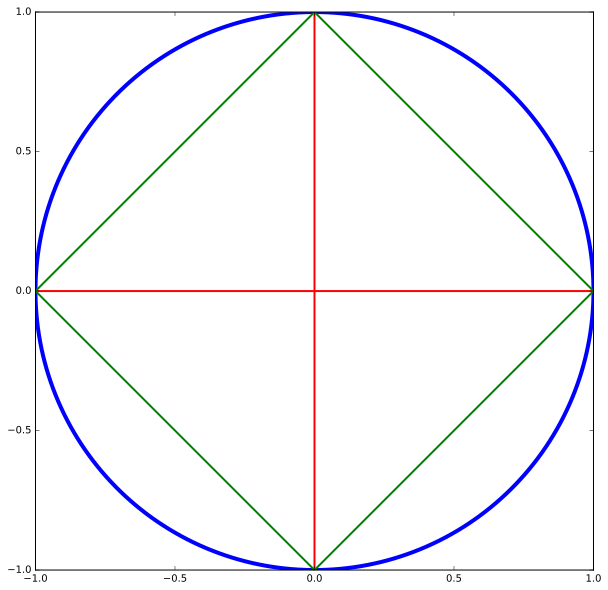

In [5]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.cos(angles), np.sin(angles), lw=4);
ax.plot([0, 0], [-1, 1], 'r', lw=2);
ax.plot([-1, 1], [0, 0], 'r', lw=2);
ax.plot([0, 1], [1, 0], 'g', lw=2);
ax.plot([0, 1], [-1, 0], 'g', lw=2);
ax.plot([0, -1], [1, 0], 'g', lw=2);
ax.plot([0, -1], [-1, 0], 'g', lw=2);

Note something : the disk within the blue circle has a diameter of $2$, thus its surface is equal to $\pi$. The green square is composed of $4$ isocele rectangular triangles which can be shuffled to be reorganized in two unit squares: its surface is thus equal to $2$. Equivalently, the edge length is $\sqrt 2 $ (because it is the hypothenuse of the unit square and by Pythagoras' theorem its length is $\sqrt{1^2 + 1^2}$) such that we verify that the surface is $2$.

Let's now take a bunch (let's say $22$) of smarties (©) and let's throw them all at random on the pie. (Say that if one falls outside , you do not eat it but throw it again until it lands on the pie.)

In [6]:
N_smarties = 22
np.random.seed(42+1)
angle_smarties = 2*np.pi*np.random.rand(N_smarties)
radius_smarties = np.sqrt(np.random.rand(N_smarties))
x_smarties = radius_smarties * np.cos(angle_smarties)
y_smarties = radius_smarties * np.sin(angle_smarties)

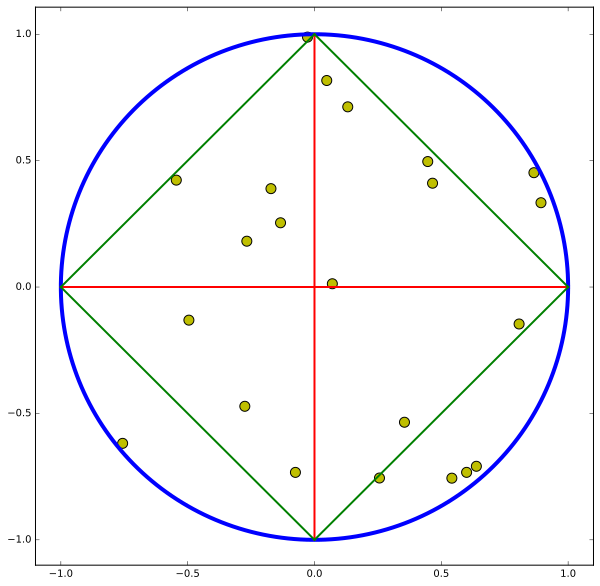

In [7]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.cos(angles), np.sin(angles), lw=4);
ax.plot([0, 0], [-1, 1], 'r', lw=2);
ax.plot([-1, 1], [0, 0], 'r', lw=2);
ax.plot([0, 1], [1, 0], 'g', lw=2);
ax.plot([0, 1], [-1, 0], 'g', lw=2);
ax.plot([0, -1], [1, 0], 'g', lw=2);
ax.plot([0, -1], [-1, 0], 'g', lw=2);
ax.scatter(x_smarties, y_smarties, s=100, c='y', lw=1);
ax.axis('tight');

It's ready! We have our finished pie with the square and the smarties. 

## Monte Carlo?

Now, why "Monte Carlo"? Because it is a city in southern France which is well known for casinos, where randomness rules the game (most often is favor of the owners of the casino, but this is another story). As a consequence, mathematicians used this term (jokingly) to designate a method that will use randomness to compute results. This is in particular much used to compute surfaces, which bear the name of "integrals" (their symbol being $\int$) in mathematics. They have many practical uses in mathematics and physics and the variables are often in very high dimensional spaces, but for now we will land back to the 2D space of our pie...

Indeed, what is the relationship with our pie? 

First, let's note that it's easy to count the number of smarties that are in the square:

In [8]:
in_square = ((x_smarties+y_smarties)**2 < 1 ) * ((x_smarties-y_smarties)**2 < 1 )

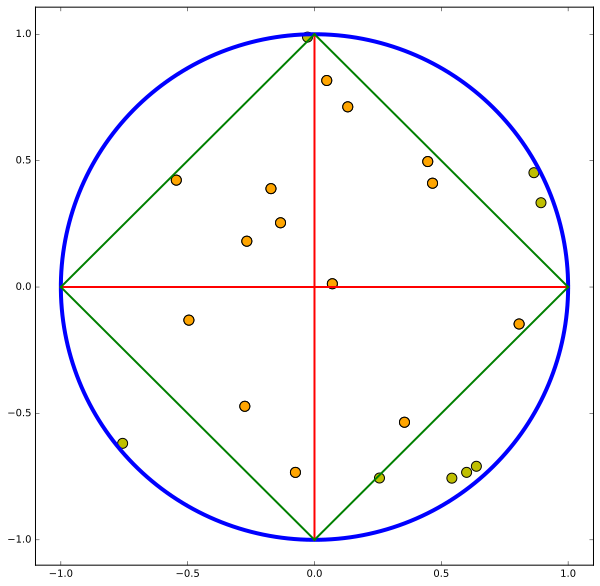

In [9]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(np.cos(angles), np.sin(angles), lw=4);
ax.plot([0, 0], [-1, 1], 'r', lw=2);
ax.plot([-1, 1], [0, 0], 'r', lw=2);
ax.plot([0, 1], [1, 0], 'g', lw=2);
ax.plot([0, 1], [-1, 0], 'g', lw=2);
ax.plot([0, -1], [1, 0], 'g', lw=2);
ax.plot([0, -1], [-1, 0], 'g', lw=2);
ax.scatter(x_smarties, y_smarties, s=100, c='y', lw=1);
ax.scatter(x_smarties[in_square], y_smarties[in_square], s=100, c='orange', lw=1);
ax.axis('tight');

We have thrown the smarties at random: their probability to land anywhere on the pie is uniform. As a consequence, their probability to land inside the square is the ratio between the respective surfaces of the square and the circle, that is, $\frac{2}{\pi}\approx 63\%$. Let's see what this gives:

In [10]:
print(u' >> Probability of landing on the square ', 2 / np.pi)
print(u' >> our observation ', np.sum(in_square)/N_smarties)

 >> Probability of landing on the square  0.6366197723675814
 >> our observation  0.636363636364


pretty close! But we also get something fun: the relative number of smarties (hence the name "smarts" [ref. needed]) may give an approximation of $\pi$ as 

$$
\pi \approx 2 * \frac {N}{n}
$$

where $N$ is the total number of smarties and $n$ the number of smarties in the square. I found that the possibility of approximating such a highly respected
number as π simply by using randomness and a pie a good enough reason to submit my recipe to the contest...

Let's now see what our particular pie (which can be considered as one instance of a Monte Carlo experiment):



In [11]:
print(u' >> Probability of landing on the square ', 2 / np.pi)
print(u' >> our estimate of π = ', 2.*N_smarties/np.sum(in_square), ' ; True value is π = ', np.pi)
print(u' >> error = ', (2.*N_smarties/np.sum(in_square)-np.pi)/np.pi * 100, ' % ')

 >> Probability of landing on the square  0.6366197723675814
 >> our estimate of π =  3.14285714286  ; True value is π =  3.141592653589793
 >> error =  0.0402499434771  % 


GREAT! We get an estimate of the order of $0.04 \%$!

## a quantitative evaluation

We may summarize our method and evaluate it for arbitrary numbers of smarties:

In [12]:
def monte_carlo(N_smarties=22, seed=2015):
    np.random.seed(seed)
    angle_smarties = 2*np.pi*np.random.rand(N_smarties)
    radius_smarties = np.sqrt(np.random.rand(N_smarties))
    x_smarties = radius_smarties * np.cos(angle_smarties)
    y_smarties = radius_smarties * np.sin(angle_smarties)
    in_square = ((x_smarties+y_smarties)**2 < 1 ) * ((x_smarties-y_smarties)**2 < 1 )
    return 2.*N_smarties/np.sum(in_square)

Let's now see what this method gives with 10, 100, ..., one million smarties (what a pie!):

In [13]:
for N in 10**np.arange(7):
    print(u' >> with ', N, ' smarties, our estimate of π = ', monte_carlo(N_smarties=N))

 >> with  1  smarties, our estimate of π =  2.0
 >> with  10  smarties, our estimate of π =  2.22222222222
 >> with  100  smarties, our estimate of π =  4.0
 >> with  1000  smarties, our estimate of π =  3.1007751938
 >> with  10000  smarties, our estimate of π =  3.11623558741
 >> with  100000  smarties, our estimate of π =  3.14322085841
 >> with  1000000  smarties, our estimate of π =  3.14530688759


We see that our estimate gets better, the bias gets lower. How variable is the algorithm?

When we do not have as many smarties, one can repeat the experiment many times. To do this we use an important aspect of random number generators: they are *pseudo*-random. Indeed, such functions most often give by default completely different sequences of numbers, but one has the possibility of generating the same sequence (of random numbers) if one specifies the "seed", that is a number which intializes the number genrator. As such one says that the generated sequence is *pseudo*-random (because it can be guessed if and only if one knows the seed), or also that it is *frozen*. Here, we simply use the seed to generate different sequences in a reproducible way:


In [14]:
for seed in range(42, 55):
    print(u' >> with seed = ', seed, ' , our estimate of π = ', monte_carlo(seed=seed))

 >> with seed =  42  , our estimate of π =  2.93333333333
 >> with seed =  43  , our estimate of π =  3.14285714286
 >> with seed =  44  , our estimate of π =  3.66666666667
 >> with seed =  45  , our estimate of π =  2.58823529412
 >> with seed =  46  , our estimate of π =  2.93333333333
 >> with seed =  47  , our estimate of π =  3.38461538462
 >> with seed =  48  , our estimate of π =  3.38461538462
 >> with seed =  49  , our estimate of π =  3.14285714286
 >> with seed =  50  , our estimate of π =  3.66666666667
 >> with seed =  51  , our estimate of π =  3.66666666667
 >> with seed =  52  , our estimate of π =  2.93333333333
 >> with seed =  53  , our estimate of π =  4.0
 >> with seed =  54  , our estimate of π =  2.58823529412


But what? The method is very fine for some seeds, but not for other... How come and what do we learn from that observation?

Let's imagine $N=1000$ and let's do many ($10000$) repetitions of our estimate:

In [15]:
N_trials = 10000
pi_estimate = np.empty(N_trials)
for seed in range(N_trials):
    pi_estimate[seed] = monte_carlo(N_smarties=1000, seed=42 + seed)
N_bins = 32
pi_hist, bins = np.histogram(pi_estimate, bins=np.linspace(2.8, 3.5, N_bins))

We can thus draw an histogram, that is, a diagram showing the number of values obtained by independent repetitions of our method:

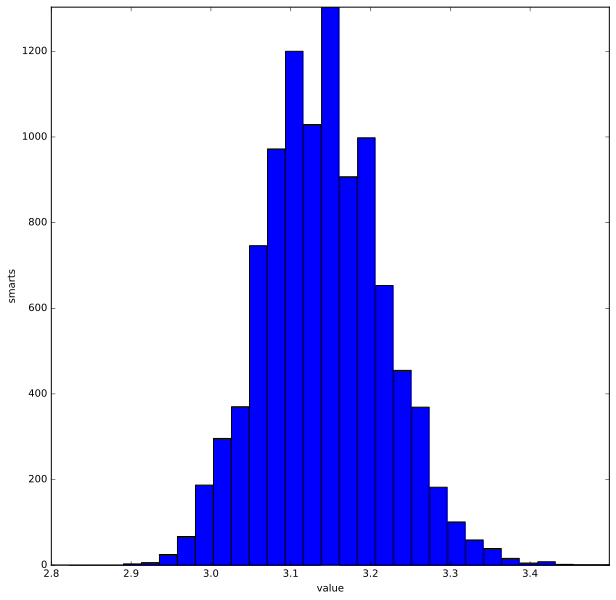

In [16]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
ax.set_xlabel('value')
ax.set_ylabel('smarts')
ax.axis('tight');

This is often occuring in science: Imagine you try to find an unknown value (in machine learning terminology, this is a *hidden* or *latent* variable), and that is here $\pi$, but you have an approximate measurement (our Monte Carlo algorithm, a device that sometimes fails, a telescope which looks at a faint, very far away light source, a neuron that fires in an unpredictive way, ...). Evaluating this variability is therefore essential in the scientific process and (instead of being thrown under the carpet) should be assessed explictly.

Luckily, mathematics provides some useful tools and we will just explore some examples of them. First, you may have recognized the shape of the histogram, it is a Gaussian (or *normal*, or *bell*-shaped) distribution characterized by only two parameters (what statisticians call the 2 first moments):

In [17]:
pi_mean = pi_estimate.mean()
pi_std = pi_estimate.std()
print(u' >> bell-shaped distribution with mean = ', pi_mean, ', and standard deviation = ', pi_std)

 >> bell-shaped distribution with mean =  3.14187806555 , and standard deviation =  0.0749742780533


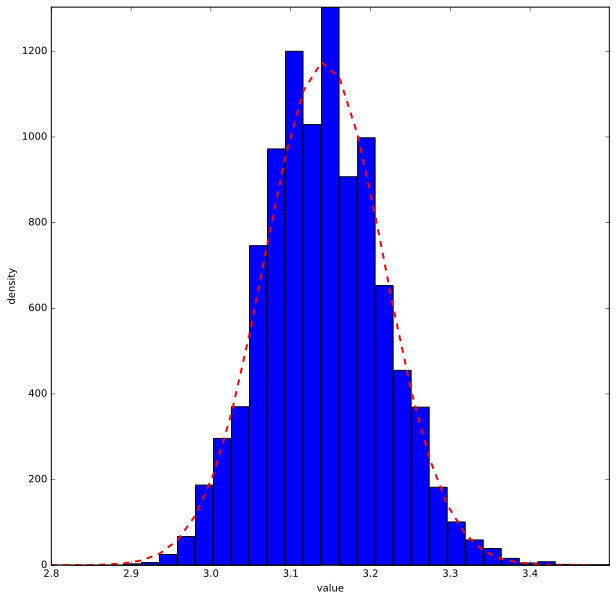

In [18]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
ax.plot(bins[:-1], N_trials/N_bins/np.sqrt(4*np.pi)/pi_std  * np.exp(- .5 * (bins[:-1] -pi_mean)**2 / pi_std**2), 'r--', lw=2);
ax.set_xlabel('value')
ax.set_ylabel('density')
ax.axis('tight');

This result is the consequence of an ubiquitous theorem : the *central limit theorem*. The latter states that whenever you collect values which are noisy around a mean value and that this level of variability (given by the standard deviation) is constant, then the distribution is Gaussian. 

It also states an important result: whenever you increase the number of samples you take (that is, in our case the number of smarties), the mean and standard deviation are always similar but their precision get better with respect to the true value:

Using  100  smarties, the bell-shaped distribution has mean =  3.16122626069 , and standard deviation =  0.246198049338
 >> error =  0.624957124207  % 
 >> scaled squared error =  0.00390571407097
Using  1000  smarties, the bell-shaped distribution has mean =  3.14187806555 , and standard deviation =  0.0749742780533
 >> error =  0.00908494487839  % 
 >> scaled squared error =  8.25362234434e-06
Using  10000  smarties, the bell-shaped distribution has mean =  3.14182844448 , and standard deviation =  0.0238642275307
 >> error =  0.00750545727277  % 
 >> scaled squared error =  5.63318888734e-05
Using  100000  smarties, the bell-shaped distribution has mean =  3.1416448727 , and standard deviation =  0.00745752967425
 >> error =  0.00166218600526  % 
 >> scaled squared error =  2.76286231608e-05


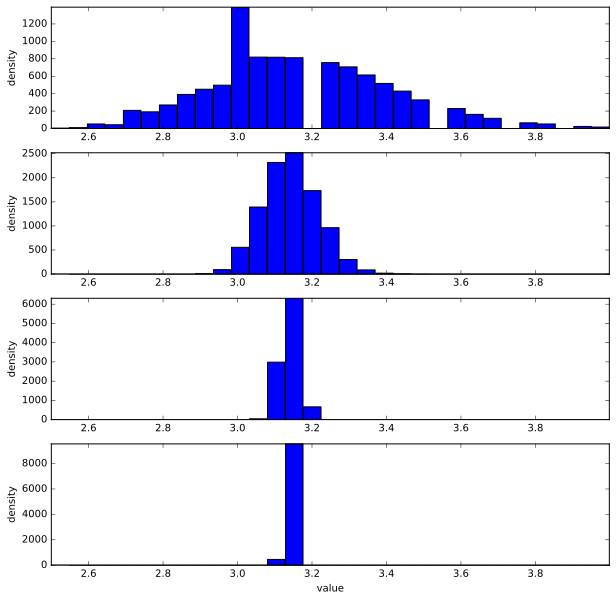

In [19]:
N_trials = 10000
N_levels = 4
fig, axs = plt.subplots(N_levels, 1, figsize=figsize)
for i_level in range(N_levels):
    N_smarties = 10**(2 + i_level)
    pi_estimate = np.empty(N_trials)
    for seed in range(N_trials):
        pi_estimate[seed] = monte_carlo(N_smarties=N_smarties, seed=42 + seed)
    pi_hist, bins = np.histogram(pi_estimate, bins=np.linspace(2.5, 4., N_bins))

    pi_mean = pi_estimate.mean()
    pi_std = pi_estimate.std()
    print(u'Using ', N_smarties, ' smarties, the bell-shaped distribution has mean = ', pi_mean, ', and standard deviation = ', pi_std)
    print(u' >> error = ', np.abs(pi_mean-np.pi)/np.pi * 100, ' % ')
    print(u' >> scaled squared error = ', ((pi_mean-np.pi)/np.pi)**2 * (N_smarties))
    
    axs[i_level].bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
    axs[i_level].set_ylabel('density')
    axs[i_level].axis('tight');
axs[i_level].set_xlabel('value');


In particular, this shows that the squared root of the error scales with the square root of the number of smarties. As such, one important value is to consider the precision as the inverse of the squared standard deviation (that is of the variance) as it scales linearly with the number of trials.

Just remember the hierarchy of our procedure:

 - we test our distributions at different levels
 - for each level, we make different trials,
 - for each trial, we make a pie with many smarties and count the ones in the squares.
 
Yet, it only takes some seconds on the computer - hence the popularity of the method nowadays.

As a consequence, scientists use some caution whenever they get a result. Any inferred value is most often given within a confidence interval, for instance by giving:

 - the median value of the different repetitions (that is the value that corresponds to that where half of the other values are below and the other half above),
 - the confidence interval as the values around the median correponding to 95% of the cases

In [20]:
N_trials = 10000
pi_estimate = np.empty(N_trials)
for seed in range(N_trials):
    pi_estimate[seed] = monte_carlo(N_smarties=1000, seed=42 + seed)
pi_hist, bins = np.histogram(pi_estimate, bins=np.linspace(2.8, 3.5, 32))
pi_median = np.median(pi_estimate)
pi_low = np.percentile(pi_estimate, 5)
pi_high = np.percentile(pi_estimate, 95)
print(u' >> distribution with median = ', pi_median, ', in interval [ ', pi_low, ',', pi_high, ']')

 >> distribution with median =  3.13971742543 , in interval [  3.02114803625 , 3.26797385621 ]


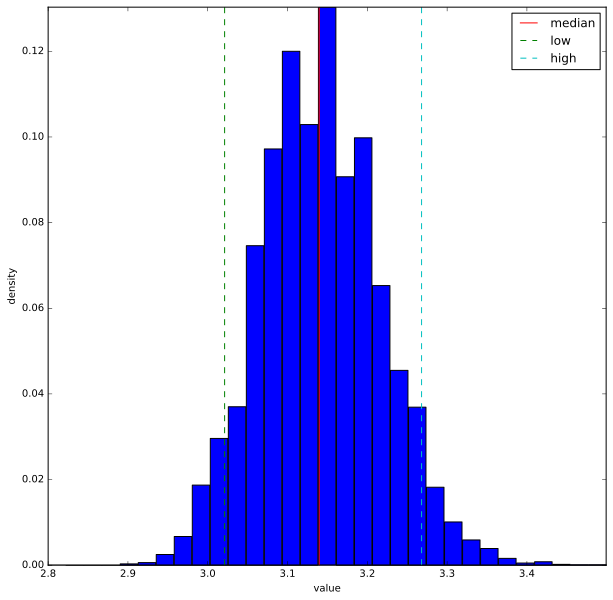

In [21]:
fig, ax = plt.subplots(figsize=figsize)
pi_hist = pi_hist * 1.
pi_hist /= pi_hist.sum()
ax.bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
ax.plot([pi_median, pi_median], [0, pi_hist.max()], 'r', label='median');
ax.plot([pi_low, pi_low], [0, pi_hist.max()], 'g--', label='low');
ax.plot([pi_high, pi_high], [0, pi_hist.max()], 'c--', label='high');
ax.set_xlabel('value')
ax.set_ylabel('density')
ax.axis('tight');
ax.legend(loc='best');

The journey is almost over: from a pie, we devised an algorithm in the form of a recipe to compute the value of π. Then we observed that the result of our recipe varied, but that we could use some mathematical tools to quantify this variablity. We now know that π is around $3.15$ and *almost surely* between $3.05$ and $3.25$. Nice.

## the elephant in the room

But wait... This result is at stake with the result we got in our $22$-smarties pie for which we triumphed with an estimate of the order of $0.04 \%$! This is far, far better than the result we got with $10000$ of $1000$-smarties-pies... What happened?

Above we saw that the results depended on the instance of how we chose to seed the random number generator:

In [22]:
for seed in range(42, 55):
    print(u' >> with seed = ', seed, ' , our estimate of π = ', monte_carlo(seed=seed))

 >> with seed =  42  , our estimate of π =  2.93333333333
 >> with seed =  43  , our estimate of π =  3.14285714286
 >> with seed =  44  , our estimate of π =  3.66666666667
 >> with seed =  45  , our estimate of π =  2.58823529412
 >> with seed =  46  , our estimate of π =  2.93333333333
 >> with seed =  47  , our estimate of π =  3.38461538462
 >> with seed =  48  , our estimate of π =  3.38461538462
 >> with seed =  49  , our estimate of π =  3.14285714286
 >> with seed =  50  , our estimate of π =  3.66666666667
 >> with seed =  51  , our estimate of π =  3.66666666667
 >> with seed =  52  , our estimate of π =  2.93333333333
 >> with seed =  53  , our estimate of π =  4.0
 >> with seed =  54  , our estimate of π =  2.58823529412


and if we make many of these experiments, this is what we get: 


In [23]:
N_trials = 10000
pi_estimate = np.empty(N_trials)
for seed in range(N_trials):
    pi_estimate[seed] = monte_carlo(N_smarties=22, seed=42 + seed)
pi_hist, bins = np.histogram(pi_estimate, bins=np.linspace(2., 5., 128))

We can thus draw an histogram, that is, a diagram showing the number of values obtained by independent repetitions of our method:

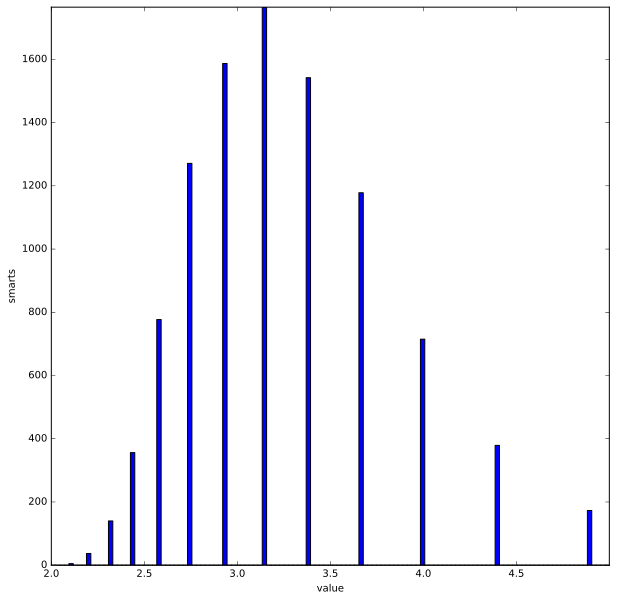

In [24]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(bins[:-1], pi_hist, width=(bins.max()-bins.min())/(len(bins)));
ax.set_xlabel('value')
ax.set_ylabel('smarts')
ax.axis('tight');

Since, we use a small number of smarties, the estimate can take only a small number of values : the distribution still has a gaussian envelope, but is non-null only for certain values. Among these values, the one which is the most probable is the value which gives for an approximation of π:

In [25]:
print(u' >> our estimate of π = ', 22/7, ' ; True value is π = ', np.pi)

 >> our estimate of π =  3.142857142857143  ; True value is π =  3.141592653589793


This approximation of π is known from a long time [ref needed], and two questions arise:

 - did the cook lie?
 - why is that approximation so good?
 
For the first question, you can answer quite easily. Either the cook cheated and placed 7 smarties outside the square on purpose, or he did not cheat 

In [26]:
print(u' >> estimate that the cook cheated = ', (1 - pi_hist.max() / pi_hist.sum()) * 100, ' % ')

 >> estimate that the cook cheated =  82.2166246851  % 


Pretty high, and I must admit this was the case... It teaches us also to be cautious whenever we hear about some (too) extraordianry scientific results - especially if it has not been carefully designed to avoid such biases. Our bias here is that the cook new that $22$ may give a good estimate.

This leads to a second question, why 22 and not 42? A priori, there is no reason that one approximation of π should be better than any other. Let's see the error when we change the denominator:

$$
\pi \approx \frac n d
$$
such that
$$
n = I( \pi \cdot d)
$$
where $I(x)$ is the integer value of $x$.

In [27]:
for denominator in np.arange(1, 20):
    numerator = np.ceil(np.pi*denominator)
    print(u' >> our estimate of π = ', int(numerator), '/', denominator, '= ', numerator/denominator , ' ; Error around π = ', np.absolute(1.*numerator/denominator - np.pi))

 >> our estimate of π =  4 / 1 =  4.0  ; Error around π =  0.85840734641
 >> our estimate of π =  7 / 2 =  3.5  ; Error around π =  0.35840734641
 >> our estimate of π =  10 / 3 =  3.33333333333  ; Error around π =  0.191740679744
 >> our estimate of π =  13 / 4 =  3.25  ; Error around π =  0.10840734641
 >> our estimate of π =  16 / 5 =  3.2  ; Error around π =  0.0584073464102
 >> our estimate of π =  19 / 6 =  3.16666666667  ; Error around π =  0.0250740130769
 >> our estimate of π =  22 / 7 =  3.14285714286  ; Error around π =  0.00126448926735
 >> our estimate of π =  26 / 8 =  3.25  ; Error around π =  0.10840734641
 >> our estimate of π =  29 / 9 =  3.22222222222  ; Error around π =  0.0806295686324
 >> our estimate of π =  32 / 10 =  3.2  ; Error around π =  0.0584073464102
 >> our estimate of π =  35 / 11 =  3.18181818182  ; Error around π =  0.0402255282284
 >> our estimate of π =  38 / 12 =  3.16666666667  ; Error around π =  0.0250740130769
 >> our estimate of π =  41 / 13 

Let's plot the error as a function of the denominator

In [28]:
def int_numerator(denominator, number=np.pi): 
    return np.ceil(number*denominator)

N_test = 10000
pi_error = np.empty(N_test)
for i_test in range(N_test):
    denominator = 1. + i_test
    numerator = int_numerator(denominator)
    pi_error[i_test] = np.absolute(numerator/denominator - np.pi)

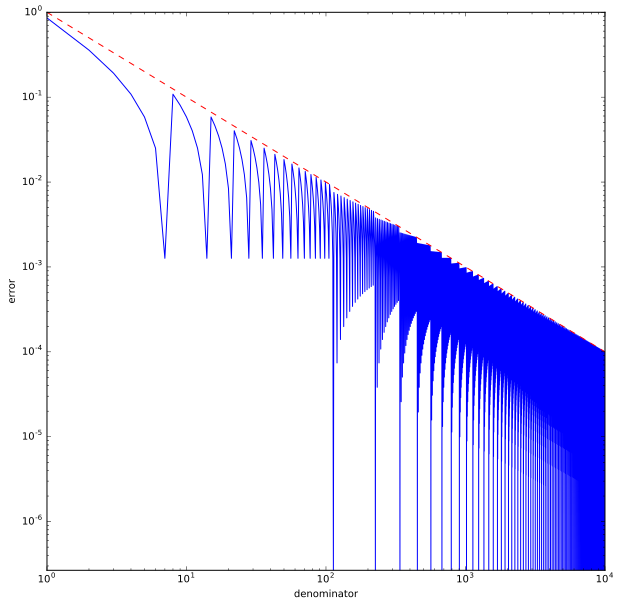

In [29]:
fig, ax = plt.subplots(figsize=figsize)
ax.loglog(np.arange(1, 1 + N_test), pi_error);
ax.loglog(np.arange(1, 1 + N_test), np.arange(1, 1 + N_test)**-1., 'r--');
ax.set_xlabel('denominator')
ax.set_ylabel('error')
ax.axis('tight');

Interestingly, the envelope of this curve (the error with respect to the denominator) follows a decreasing trend: this was to be expected when we think again at the central limit theorem: as the denominator increases, the precision increases. We have shown this in the plot above by showing the $1/d$ line, which is a straight line in this plot, because we used log scales on both axis. 

Compared to this baseline, what is more surprising is that the error decreases, then makes a "spike" then goes back to baseline. 
The first spike lies at 7 and for the 16 next repetitions:

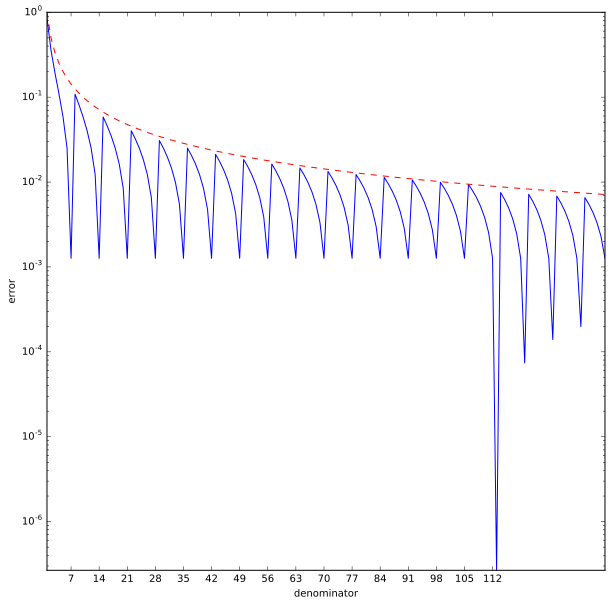

In [30]:
fig, ax = plt.subplots(figsize=figsize)
N_step = 140
ax.semilogy(np.arange(1, 1 + N_step), pi_error[:N_step]);
ax.semilogy(np.arange(1, 1 + N_step), np.arange(1, 1 + N_step)**-1., 'r--');
ax.set_xlabel('denominator')
ax.set_xticks(7*np.arange(17))
ax.set_xticklabels(7*np.arange(17))
ax.set_ylabel('error')
ax.axis('tight');

The fact that we see a repetition of same pattern is to be expected as it is the same approximation scaled by an integer:

$$
\frac {22} {7} = \frac {22*2} {7*2} =\frac {44} {14} = \frac {22*3} {7*3} = \frac {66} {21} = \ldots
$$

In retrospect, the shape before the spike can be understood as the error quite smoothly approaches the 22 / 7 approximation (green line):

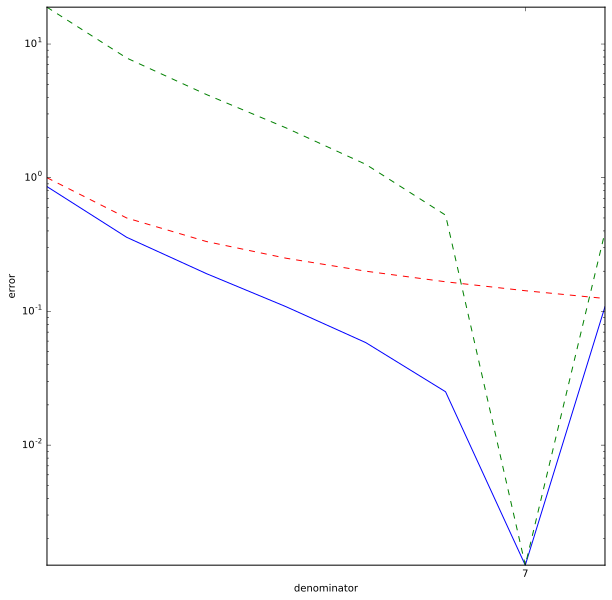

In [31]:
fig, ax = plt.subplots(figsize=figsize)
N_step = 8
ax.semilogy(np.arange(1, 1 + N_step), pi_error[:N_step]);
ax.semilogy(np.arange(1, 1 + N_step), np.arange(1, 1 + N_step)**-1., 'r--');
ax.semilogy(np.arange(1, 1 + N_step), np.absolute(22/np.arange(1, 1 + N_step) - np.pi), 'g--');
ax.set_xlabel('denominator')
ax.set_xticks(7*np.arange(17))
ax.set_xticklabels(7*np.arange(17))
ax.set_ylabel('error')
ax.axis('tight');

But *suddenly*, we have a new approximation of an even higher order:

In [32]:
for denominator in range(110, 116):
    print(u' >> our estimate of π = ', int(int_numerator(denominator)), '/', denominator, ' = ', int_numerator(denominator)/denominator, ' ; True value is π = ', np.pi)
    print(u' >> error = ', (int_numerator(denominator)/denominator-np.pi)/np.pi * 100, ' % ')

 >> our estimate of π =  346 / 110  =  3.14545454545  ; True value is π =  3.141592653589793
 >> error =  0.122927835992  % 
 >> our estimate of π =  349 / 111  =  3.14414414414  ; True value is π =  3.141592653589793
 >> error =  0.0812164667954  % 
 >> our estimate of π =  352 / 112  =  3.14285714286  ; True value is π =  3.141592653589793
 >> error =  0.0402499434771  % 
 >> our estimate of π =  355 / 113  =  3.14159292035  ; True value is π =  3.141592653589793
 >> error =  8.49136787674e-06  % 
 >> our estimate of π =  359 / 114  =  3.14912280702  ; True value is π =  3.141592653589793
 >> error =  0.239692228053  % 
 >> our estimate of π =  362 / 115  =  3.14782608696  ; True value is π =  3.141592653589793
 >> error =  0.19841634655  % 


That other approximation of π as 355 / 113 is also well known and is as useful as a 6 digits representation (and quite easy to remember from its symmetric decimal representation). Going further is quite tedious as we approach the precision of the numbers used on this computer...

At this point, we know the cook cheated and that there is something special in the appearance of approximations to π. Is there something special with π? Is it the solution to all philosophical answers (or to questions I do not remember)? So let's try with the other great number: $e$


In [33]:
N_test = 10000
e_error = np.empty(N_test)
for i_test in range(N_test):
    denominator = 1. + i_test
    numerator = int_numerator(denominator, number=np.exp(1))
    e_error[i_test] = np.absolute(numerator/denominator - np.exp(1))


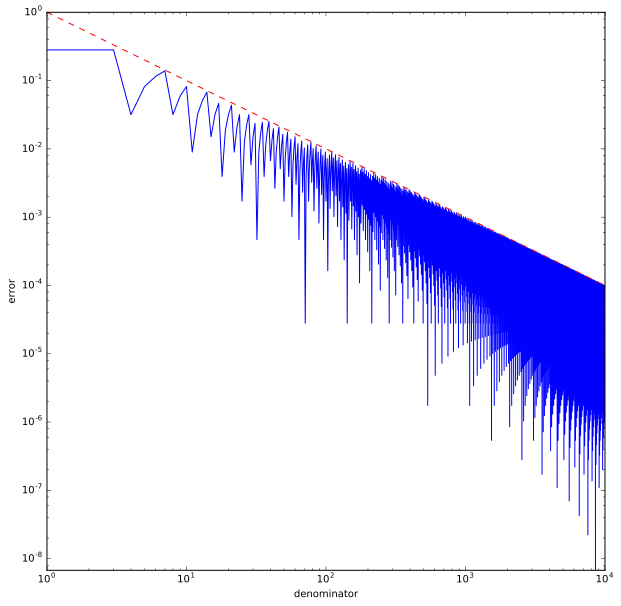

In [34]:
fig, ax = plt.subplots(figsize=figsize)
ax.loglog(np.arange(1, 1 + N_test), e_error);
ax.loglog(np.arange(1, 1 + N_test), np.arange(1, 1 + N_test)**-1., 'r--');
ax.set_xlabel('denominator')
ax.set_ylabel('error')
ax.axis('tight');

Or the golden number $\phi = .5 (1+ \sqrt 5)$ for which we expect to see ratios of consecutive Fibonacci numbers as good approximations:


In [35]:
phi = .5* (1 + np.sqrt(5))
N_test = 10000
e_error = np.empty(N_test)
for i_test in range(N_test):
    denominator = 1. + i_test
    numerator = int_numerator(denominator, number=phi)
    e_error[i_test] = np.absolute(numerator/denominator - phi)


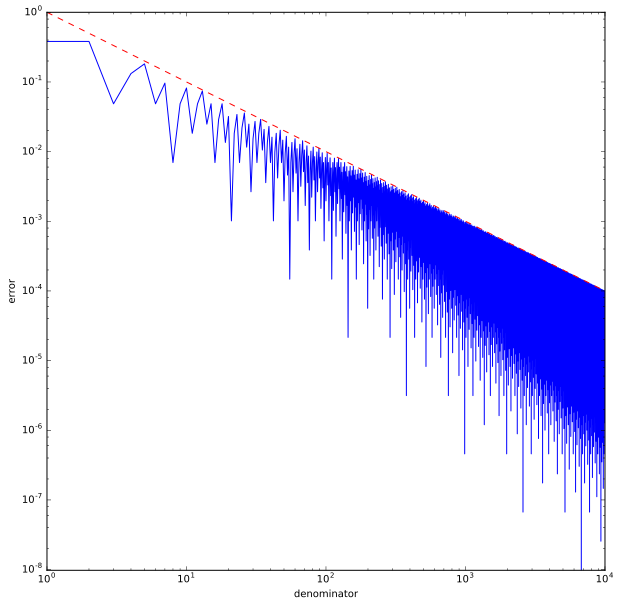

In [36]:
fig, ax = plt.subplots(figsize=figsize)
ax.loglog(np.arange(1, 1 + N_test), e_error);
ax.loglog(np.arange(1, 1 + N_test), np.arange(1, 1 + N_test)**-1., 'r--');
ax.set_xlabel('denominator')
ax.set_ylabel('error')
ax.axis('tight');

Looks similar! We were not fooled this time. But more work needs to be done to understand 